In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import numpy as np
import scvelo as scv
from tqdm.notebook import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [3]:
adata = scv.datasets.pancreas()  # mouse scRNA-seq dataset

In [3]:
from mousipy import translate
humanized_adata = translate(adata)

/fast/work/users/peidlis_c/utils/mousipy/notebooks
/fast/users/peidlis_c/work/miniconda/envs/sc_env/lib/python3.9/site-packages/mousipy


                                                     
KeyboardInterrupt



In [5]:
!pip install -e /fast/work/users/peidlis_c/utils/mousipy/ --upgrade

Obtaining file:///fast/work/users/peidlis_c/utils/mousipy
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mousipy (pyproject.toml) ... done
  Created wheel for mousipy: filename=mousipy-0.0.5-0.editable-py3-none-any.whl size=3200 sha256=133e005a4e9315a801856fb7d04e9c87311de41fd89d3c714076cbcc4a5d369b
  Stored in directory: /tmp/pip-ephem-wheel-cache-jb9bxha3/wheels/4d/ba/7d/cf65522fe85d317ad67dbedf85073e15f60832a1079bd9745f
Successfully built mousipy
  Attempting uninstall: mousipy
    Found existing installation: mousipy 0.0.5
    Uninstalling mousipy-0.0.5:
      Successfully uninstalled mousipy-0.0.5


In [1]:
!pip install mousipy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: mousipy
    Found existing installation: mousipy 0.0.5
    Uninstalling mousipy-0.0.5:
      Successfully uninstalled mousipy-0.0.5


In [4]:
from mousipy import translate

In [5]:
adata.X = adata.X.A.copy()  # make dense
humanized_adata = translate(adata)  # check if this throws error on ".A"

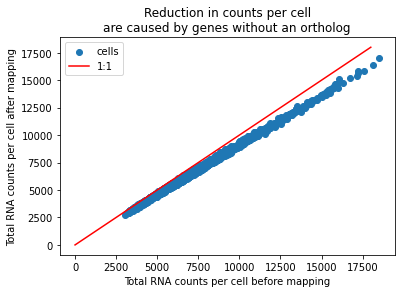

In [6]:
# Minimal loss in counts
counts_per_cell_after = np.sum(humanized_adata.X, axis=1)
counts_per_cell_before = np.sum(adata.X, axis=1)

pl.scatter(counts_per_cell_before, counts_per_cell_after, label='cells')
pl.title('Reduction in counts per cell\nare caused by genes without an ortholog')
pl.xlabel('Total RNA counts per cell before mapping')
pl.ylabel('Total RNA counts per cell after mapping')
pl.plot([0,18000], [0,18000], c='r', label='1:1')
pl.legend()
pl.show()

In [7]:
mcl = np.median(counts_per_cell_before - counts_per_cell_after)
mc = np.median(counts_per_cell_before)
print(f'A median cell lost {int(mcl)} of {int(mc)} counts ({np.round(100*mcl/mc,2)}%) during the mapping process.')
print(f'Mousipy could map {adata.n_vars} to {humanized_adata.n_vars} genes.')

A median cell lost 459 of 6194 counts (7.41%) during the mapping process.
Mousipy could map 27998 to 17450 genes.


In [8]:
humanized_adata.shape

(3696, 17450)

In [9]:
adata.shape

(3696, 27998)